##### A work in progress: This notebook is a work in progress, so there might be a few bugs here and there, and parts of it are not (yet) pretty, but i think some salient concepts are represented, and overall, it's getting there...
- This notebook contains collections of puzzles and toy codes.
- Most of these solutions are fairly quick drafts, so they may not be fully optimized.
- Also, some codes may be written more for readability or to illustrate the salient concepts, rather than for optimal compactness or speed performance (ie, for-loops might be blocked out rather than written in list comprehension format).

#### In this Notebook:
- "Adds up to 100" puzzle: Given a set of numbers, find the pairs that add up to 100.
   - The continuum case
   - The integer case
- Permutaions:
    - There are few good reasons to write your own permutaiton iterator -- especially in Python, since *itertools* (or a simialr library) will almost certainly do it better, but here is the basic framework
- "Maximum sum in a contiguous window" puzzle
    - Gien a vector of numbers, find the contiguous window with the maximum sum. This is similar to the "maximum trade" puzzle I have here somewhere else.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



In [15]:
import matplotlib
import pylab as plt
from matplotlib import style
import datetime as dtm
import matplotlib.dates as mpd
#
import numpy
import scipy
import random
import itertools
import math
#
import sklearn
import pandas
#
try:
    have_pandas_datareader = True
    import pandas_datareader.data as pdr
except:
    have_pandas_datareader = False
    print('PANDAS data reader not found. Install using conda, pip, or some other methd:')
    print('> conda install pandas-datareader\n> pip install pandas-datareader')

import os
import sys

colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


### The "Adds up to 100" puzzle:
- The question is more or les stated, "Given some vector of "numbers" $X$ of positive numbers, which might be quite large, how many pairs of numbers add up to 100?"
- First, answer the question with a question: What kind of numbers? Integers? Over what range -- are all of the numbers $x_j < 100$?
- Here, we will provide reasonably general solutions for both the continuum and integer cases.
- Note that fundamentally, this is an $ON^2$ problem, but we want to reduce that as much as possible.e 

#### Summary findings:
- We can use sorting based strategies to significantly reduce the order of the algorithm for continuum sequences, though the performance of such an algorithm might be difficult to anticipate
- For integers, we can reduce the problem to approximately $ON$, or $c \to ON$ in the limit of very large $N$. This reduction arises from the simple fact that, no matter how large $N$ is, there are only 101 distinct values of interest, all positive integers $x \le 100$, including $0$. Therefore, we can index the set like, $I = \{ x:n_x, ... \}$ where $0 \le x \le 100$ are the values of $x$ and $n_x$ are the number of that value in the set.
- We can now look for the number of pairs in this reduced set, and in fact, because the valuse are integer type, we can again use our index. For each value $x_j$, we can compute its compliment, $x^c_j = 100 - x_j$; we can then look up $x^c_j$ in our index, and the

### Make a sequence of numbers

In [16]:
N = 1000
R = random.Random()
#
x_min = 0.
x_max = 100.
#
# search range:
x_lo = 50.
x_hi = 60.
#
X = [R.random()*(x_min + (x_max - x_min)) for _ in range(N)]
#

### Continuum case:
- First, we might assume based on how the question was phrased that we can ignore this case. Continuum values never really equal oneanother, so we'll modify the question to say something like, find the pairs of numbers whose sum is between $x_{min} < x_1 + x_2 < x_{max}$, where $x_{min}$ and $x_{max}$ represent the range of interest. For example, in the spirit of the initial question, as stated, we might want all pairs $x_j,~x_j$ such that $99.0 < x_j + x_k < 100$.
- We don't have too much to work with; this problem is still fundamentally (as much as) $ON^2$, but:
    - We can use sorting to possibly reduce the scope a bit
    - Obviuosly, we can exclude any numbers $x>x_{max}$
    - ... etc.
- So this gets us approximately $O(N \cdot \log(N) + \alpha N^2)$, where $\alpha$ is more or less (exactly?) the square of the fraction of values $x < x_{max}$.
- So we observe significant reductions in the complexity, even for $x_{hi} \approx x_{max}$. The next step might be to figure out a witty indexing or modulus-skipping system to optimize the search for small $x$.


In [17]:
# now, find all pairs where x1 < (x_j + x_k) < x2
#
# make a sorted copy of X:
X_prime = list(sorted(X))
pairs = []
nits = 0
#
# we should maybe (or maybe not) use itertools, but first, let's just block it out:
for j, x1 in enumerate(X_prime):
    # is this a valid value for x1? if we've already exceeded our maximum value, we can stop spinning...
    if x1>x_hi: break
    #
    for k, x2 in enumerate(X_prime):
        nits += 1
        if x2 + x1 > x_hi:
            break
        x = x1 + x2
        if x>=x_lo and x<=x_hi:
            pairs += [[j,k, x1, x2, x]]
        #
#
#       

print("Number of distinct pairs: {}".format(len(pairs)))
print('nits: {}/{} ({:.3f})'.format(nits, N*N, nits/(N*N)))

Number of distinct pairs: 51465
nits: 170890/1000000 (0.171)


#### Variable Types: The Integer trick

- So that's the sort of problem we would probably encounter in physical science -- continuum values.
- But in CS, or just for the sake of puzzles, let's consider the case where $X$ is restricted to positive ingegers, this problem becomes approximately $ON$ for large $N$. The number of integers that add to 100 is small (it's 100).
- We solve the problem in two steps. We index and filter the input:
    - Exclude all values $x>100$; count and index the number of each value $x \le 100$
    - Now, for each entry $x_j$, compute the colplement $x_k = 100 - x_j$, and add the total count, $n = n_j \cdot n_k$.
    - Note that we return the pairs, $x_j + x_k = 100$, and their counts. These are $2 \times$ degenerate, in that we get two redundant pairs, $(x_j, x_k) = (x_k, x_j)$, so if we want the total count, add these up and divide by two. 
    - ...or equivalently, add up half of them. So we only need to spin over $0 < x_1 < 50$.
- Note also that, we interpret this challenge with the simplified rule that an element can be use multiple times, in multiple pairs. If we can only use an entry once, the number of single-use pairs is $n=min(n_j, n_k)$.

In [18]:
N = 10000
R = random.Random()
#
x_min = 0.
x_max = 200.
#
X = [int(R.random()*(x_min + (x_max - x_min))) for _ in range(N)]
#
X_index = {x:0 for x in range(int(x_min), 101, 1) }
for x in X:
    if x>100: 
        continue
    #
    X_index[x] +=1
#
pairs = []
#
for x,n in X_index.items():
    # we might sort, or we can just skip x>x_0 values...
    if x>50: continue
    #if x>100: continue
    x_prime = int(100 - x)
    n_prime = X_index[x_prime]
    #
    pairs += [[(x, x_prime), (n, n_prime), n*n_prime]]
# ... but we will still count 50 twice.note that 50+50 should occur approximately half as often
# as other combinations, since it is the same one value repeated, not two values.
# generally, this might be considered an example of the kind of erro we might incur by trying to
# over optimize -- introducing complexities to the code that lend themselves to mistakes, but don't
# really add much benefit (how much do we really need the O(N/2) boost? at what cost in terms of possible
# errors?)
# now
pairs[50][-1]/=2
n_pairs = numpy.sum([rw[-1] for rw in pairs])
#
#
# a quick idot-check:
print('n[100] = {}, n[3]={}, n[5]={}'.format(X.count(100), X.count(3), X.count(5)))
print('total pairs: {}'.format(n_pairs))
#
print('pairs: ')
for p in pairs: print(p)


n[100] = 48, n[3]=43, n[5]=65
total pairs: 128307.0
pairs: 
[(0, 100), (51, 48), 2448]
[(1, 99), (55, 52), 2860]
[(2, 98), (46, 46), 2116]
[(3, 97), (43, 52), 2236]
[(4, 96), (70, 57), 3990]
[(5, 95), (65, 66), 4290]
[(6, 94), (56, 52), 2912]
[(7, 93), (43, 47), 2021]
[(8, 92), (59, 47), 2773]
[(9, 91), (36, 47), 1692]
[(10, 90), (51, 46), 2346]
[(11, 89), (48, 51), 2448]
[(12, 88), (58, 37), 2146]
[(13, 87), (51, 34), 1734]
[(14, 86), (57, 41), 2337]
[(15, 85), (54, 62), 3348]
[(16, 84), (48, 52), 2496]
[(17, 83), (45, 44), 1980]
[(18, 82), (49, 53), 2597]
[(19, 81), (47, 52), 2444]
[(20, 80), (45, 46), 2070]
[(21, 79), (48, 34), 1632]
[(22, 78), (55, 38), 2090]
[(23, 77), (56, 54), 3024]
[(24, 76), (48, 40), 1920]
[(25, 75), (64, 45), 2880]
[(26, 74), (55, 41), 2255]
[(27, 73), (55, 69), 3795]
[(28, 72), (54, 46), 2484]
[(29, 71), (48, 56), 2688]
[(30, 70), (51, 57), 2907]
[(31, 69), (51, 43), 2193]
[(32, 68), (55, 51), 2805]
[(33, 67), (56, 44), 2464]
[(34, 66), (49, 39), 1911]
[(35

In [19]:
# now, code it up into a class with some generalizations:

class Pair_Sum_Counter(list):
    def __init__(self, X, x_target=100, enforce_integers=True):
        # X: input vector. we are going to assume (and enforce) ingegers.
        # first, verify that we have integers (though we permit skipping this step, for large
        self.x_target = x_target
        self.enforce_integers = enforce_integers
        # data sets and confident operators):
        if enforce_integers:
            # check for integers, then cast? or just cast? since we don't know what we're going to get,
            # we're guessing at which approach optimizes, so just keep it simple.
            # we might also block out the loop so we can raise a warning for non-integer types,
            # but that will compromize performance in Python.
            X = [int(x) for x in X]
        #
        # now, index X:
        # to index all of X (number of each value):
        #self.update({x:0 for x in set(X)})
        #
        # but we really only want:
        X_index = {k:0 for k in range(0, x_target+1, 1)}
        #
        # now count:
        for x in X:
            if x>x_target: 
                continue
            #
            X_index[x] +=1
        #
        pairs = self
        #
        # for simplicity, let's just count all the pairs, recognize that we are double-counting the
        # (arguably) degerate cases (a,b) == (b,a). we can optimize by skipping the second half of the primary
        # loop, but then we have to handle odd/even cases separately (aka, for 50 + 50 = 100), and the main
        # objective of this algorithm is to reduce an ON^2 problem to ~O(x_target), so a factor of 2 here
        # is usually a small problem.
        for x,n in X_index.items():
            # we might sort, or we can just skip x>x_0 values...
            if x>x_target: continue
            x_prime = int(x_target - x)
            n_prime = X_index[x_prime]
            #
            pairs += [[(x, x_prime), (n, n_prime), n*n_prime]]
        #
        # this should always be even (sum([])/2 is integer)
        self.n_pairs = numpy.sum([rw[-1] for rw in pairs])/2.

In [20]:
# first, check vs. previous code:     
PSC = Pair_Sum_Counter(X=X, x_target=100)
print(PSC.n_pairs)

print('***')
print(pairs[0:5])
print('*****\n*****')
print(PSC[0:5])
#
# what about some other x_target?
PCS2 = Pair_Sum_Counter(X=X, x_target=42)
print(PCS2[0:5])

128307.0
***
[[(0, 100), (51, 48), 2448], [(1, 99), (55, 52), 2860], [(2, 98), (46, 46), 2116], [(3, 97), (43, 52), 2236], [(4, 96), (70, 57), 3990]]
*****
*****
[[(0, 100), (51, 48), 2448], [(1, 99), (55, 52), 2860], [(2, 98), (46, 46), 2116], [(3, 97), (43, 52), 2236], [(4, 96), (70, 57), 3990]]
[[(0, 42), (51, 58), 2958], [(1, 41), (55, 55), 3025], [(2, 40), (46, 56), 2576], [(3, 39), (43, 49), 2107], [(4, 38), (70, 48), 3360]]


#### Check results with brute-force method:

In [21]:
import itertools

class Brute_Force_Pair_Counter(list):
    # brute force pair-counter. assume integer inputs, or at least that we can use
    # a == b equivalence. for float values, we really need to write an almost_equal(a,b)
    # operator, but we'll save that for a real application...
    #
    # regarding list[] inheritance... or maybe dict. eventually populate the pairs... mabye use a nested
    # dict{} structure, {x_j:{x_k:n, ...}, }
    def __init__(self, X, target_value=100):
        n_pairs = 0
        for x1,x2 in itertools.product(X,X):
            if x1 + x2 == 100: n_pairs += 1
            #
        #
        self.n_total = n_pairs
    #
BF_pairs = Brute_Force_Pair_Counter(X,100)

print('total: {} ({}), ON2:{}/{}'.format(BF_pairs.n_total/2, n_pairs, len(X)**2, 2*numpy.log10(len(X))))
#print(n_pairs*2)


total: 128307.0 (128307.0), ON2:100000000/8.0


### Diagnostics and Unit Testing
- Test the integer counter class against the Brute_Force counter class for a few data sets, for a few x_target.
- Evaluate time-to-completion (TTC), n_steps (how did we do with complexity?), and of course to be sure we get the same count(s).

### Comments: 
- Note that we can hybridize these techniques.
- If we have inherently continuum value data, can we approximate (round or truncate) those values, so that we can index them?
    - $x = 5.1$, $dx = .1$, $j=51$
    - $j_k = int \left( \frac{x_k}{dx} \right)$ 
- It gets a little bit trickeier when we then evaluate a range of equalities, using our indexed system, but it's not too bad; we simply replace our $x_c = 100 - x$ with a framework where we evaluate all $(x_{lo}-x) < x_c < (x_{hi}-x)$. How exactly we do this may depend on the properties of the data.


### Permutations
- Techniclaly (I think), "permutations" are ordered, and very straight forward
- Did we mean... I don't know, "collections?" unordered permutaions? We can get these recursively.
- Obviously, the best way to get permutations is to use itertools. We do this first to use as a validation.
- TODO: we are trying to straddle both the string and array input. What is more intuitive or versatile? To always return an array, or to return a string if the input is a string? It is easy enough to handle exceptions on the calling side either way.

In [22]:
# enter a "word" here. it can be a string or a list/array. note that internally, we use "list"
# type behavior, but we convert the input to list type right away, which handles both the string
# and numpy array behaviors.
#
my_word = numpy.array(list(range(4)))
#my_word = 'abcd'
#

In [23]:
# first, get the answer the smart way; use a compiled, tried and tested library.
# we'll compare out output to this output.
iter_permiutations = [wrd for wrd in itertools.permutations(my_word)]
#
for k, wrd in enumerate(iter_permiutations):
    if isinstance(my_word, str):
        print('[{}]: {}'.format(k, ''.join(wrd)))
        iter_permutation_words = [''.join(wrd) for wrd in iter_permiutations]
    else:
        print('[{}]: {}'.format(k, wrd)) 
#
iter_permutation_words = [''.join([str(s) for s in wrd]) for wrd in iter_permiutations]
iter_permutation_words.sort()

#

[0]: (0, 1, 2, 3)
[1]: (0, 1, 3, 2)
[2]: (0, 2, 1, 3)
[3]: (0, 2, 3, 1)
[4]: (0, 3, 1, 2)
[5]: (0, 3, 2, 1)
[6]: (1, 0, 2, 3)
[7]: (1, 0, 3, 2)
[8]: (1, 2, 0, 3)
[9]: (1, 2, 3, 0)
[10]: (1, 3, 0, 2)
[11]: (1, 3, 2, 0)
[12]: (2, 0, 1, 3)
[13]: (2, 0, 3, 1)
[14]: (2, 1, 0, 3)
[15]: (2, 1, 3, 0)
[16]: (2, 3, 0, 1)
[17]: (2, 3, 1, 0)
[18]: (3, 0, 1, 2)
[19]: (3, 0, 2, 1)
[20]: (3, 1, 0, 2)
[21]: (3, 1, 2, 0)
[22]: (3, 2, 0, 1)
[23]: (3, 2, 1, 0)


#### Homegrown permutations:
- Start with a simple ordered permutations algorithm
- Then construct un-orderd combinations by permuting on sub-sets of the input 'word'.
- Note there are subtle syntantical nuances when handling strings vs (non-string) arrays, but most of the underlying code is the same.

In [24]:
def get_ordered_permutations_str(word):
    #
    # this version assumes a string type input, returns a string type output.
    # with a few modifications (see get_rodered_permutations_ary() below) we can
    # transparently handle string or array-like input
    #
    my_permutes = []
    N = len(word)
    for k,c in enumerate(word):
        my_word = ''
        for j in range(k,k+N):
            my_word = my_word + word[j%N]
        my_permutes += [my_word]
    #print('** DEBUG:', my_permutes)
    return my_permutes
#
def get_ordered_permutations_ary(word):
    my_permutes = []
    word_ary = [c for c in word]
    N = len(word_ary)
    for k,c in enumerate(word_ary):
        #
        my_word = [word_ary[j%N] for j in range(k,k+N)]
        my_permutes += [my_word]
    #print('** ', my_permutes)
    return my_permutes
#
def get_unordered_permutations(word):
    # get all combinations by getting permutations of subsets of the complete word.
    # i expect there is a fully recursive way to do this, but this is prett efficient
    # and i think spells out the process instructively.
    #
    word_ary = [c for c in word]
    N = len(word)
    permutes = [word_ary]
    #
    for k in range(N-1):
        my_permutes = []
        for j, wrd in enumerate(permutes):
            my_permutes += [wrd[0:k] + s for s in get_ordered_permutations_ary(wrd[k:])]
            #print('** ', my_permutes[1:])
            #
        #
        # add permutations, but filter dupes (and later fund a not-dumb way to do this. i think
        # we might be able to avoid this by recursing the ordered permutations a smarter way):
        for p in my_permutes[1:]:
            if not p in permutes: permutes += [p]
        #
    return permutes
#
# some tests and diagnostics:
print('my_word: ', my_word)
xx = [''.join([str(s) for s in wrd]) for wrd in get_unordered_permutations(my_word)]

for x in set(xx):
    print(x)
print('len: ', len(set(xx)))
#
# did we get the same as itertools?
if sorted(iter_permutation_words)==sorted(xx):
    print('PASSED! our permutations are the same as itertools. ')
else:
    print('ERROR: ')
    for k,rw in enumerate(iter_permutation_words):
        print('[{}]: {}'.format(k,rw))


my_word:  [0 1 2 3]
2130
1203
2103
0321
3102
0231
2013
3012
2310
1023
0312
1320
3201
0123
3210
2031
1230
1302
3120
0213
3021
0132
1032
2301
len:  24
PASSED! our permutations are the same as itertools. 


### Maximum sum, running window
- Given an array of positive and/or negative integers. Get the max cumulative sum with any contiguous window (window of any size). Expected algo - O(n)
- example:
    > Max_sum([9 -7 8 -6 5 2] ) 
    
    > Output: 11
- And so clearly,
    > Max_sum([-3 9 -7 8 -6 5 2 -8 -9 1])
    
    > Output: 11

#### Solution(s):
- First, write a brute-force method to validate our optimized model
- Our basic strategy is to reject the ends of the array that contain negative numbers.
- There are a couple of basic approaches; they reduce to what we code up below.


In [25]:
### max window:
# find the window that yields the max sum:
A = [-3, 9, -7, 8, -6, 5, 2, -8, -9, 1]
A1 = [9, -7, 8, -6, 5, 2]
A2 = [-3, 9, -7, 8, -50, -6, 5, 2, -8, -9, 1]
N = len(A)
#
# with the exception of the sum(X[j1:j2]) this is quasi-linear, and ver straight forward, so it makes
#  nice test/validation script.
#
def max_sum_N2(X):
    N = len(X)
    my_sums = []
    for j_start in range(N):
        for j_stop in range(j_start+1, N+1):
            my_sums += [[j_start, j_stop, sum(X[j_start:j_stop])]]
            #
        #
    #
    return max(my_sums, key=lambda rw: rw[-1])
#
for a in [A, A1, A2]:
    my_answr = max_sum_N2(a)
    print('{} :: {} ({})'.format(my_answr, sum(a[my_answr[0]:my_answr[1]]), my_answr[2] == sum(a[my_answr[0]:my_answr[1]])))
# my_A = A1
# my_answr = max_sum_N2(my_A)
# print(my_answr)
# print(sum(my_A[my_answr[0]:my_answr[1]]))
# #

[1, 7, 11] :: 11 (True)
[0, 6, 11] :: 11 (True)
[1, 4, 10] :: 10 (True)


In [26]:
#
# if we want to extract the subsequence, we can use a bit of if-then logic:
#def find_max_sum_detailed(X):
class Find_max_sum_detailed(list):
    def __init__(self, X):
        #
        self.X = X
        #
        j0 = 0
        j0_best = j0
        j1 = len(X)
        #print(X)
        #
        best_sum = X[0]
        this_sum = X[0]
        #print('** ', this_sum, best_sum)
        #
        for j,x in enumerate(X[1:]):
            #
            this_sum+=x
            if x>this_sum:
                # leading terms subtract from our total; start over!
                #
                this_sum = x
                j0=j+1
            #
            if this_sum>best_sum:
                best_sum=this_sum
                j0_best=j0
                j1=j+2  # our count is one behind (X[1:]), and we want the next position...
            #
            # print('** ', this_sum, best_sum, x)
        #
        #return j0_best,j1,best_sum
        super(Find_max_sum_detailed, self).__init__((j0_best,j1,best_sum))
#
# if we are not interested in retrieving the sub-sequence itself, this is (probably) the fastest,
# simplest approach: 
# walk the vector; if the preceding sum
# is greater than the current value, start over (reject the current sum); then move forward and keep the
# subseqeunt greatest sum.
#
def find_max_sum(X):
    #
    # initialize variables
    best_sum = X[0]
    this_sum = X[0]
    #print('** ', this_sum, best_sum)
    #
    # now, walk from front to back. if the current_value < current_sum, then we reduce our
    # total sum by including the sub-sequence up to this point, so dump it and start over.
    # this is a little bit like some recursive-markov filters (Kalman Filters).
    # then, given the right starting place (we've dumped preceding sub-sequences),
    # keep the largest subsequent sum.
    for j,x in enumerate(X[1:]):
        #
        # either add current value x to this_sum, or dump this_sum (and leading sub-sequence)
        # and assign the new value.
        this_sum = max(x, this_sum+x)
        best_sum = max(best_sum,this_sum)
        #
        #print('** ', this_sum, best_sum, x)
    return best_sum
#
for k,a in enumerate([A2, A,A1, [-2] + A, [-2,-4] + A]):
    #
    print('A[{}]: {}'.format(k,a))
    
    #
    xx_1 = find_max_sum(a)
    xx_2 = Find_max_sum_detailed(a)
    xx_3 = max_sum_N2(a)
    print(xx_1)
    print(xx_2)
    print(xx_3)
    #
    #er = assert(xx_1 == xx_2[-1] == xx_3[-1])
    if not (xx_1 == xx_2[-1] == xx_3[-1]): print("ERROR: one of the methods returns a bogus value.")
    
#
for k in range(10):
    #X = numpy.random.uniform(-10,10, size=10)
    X = [int(numpy.random.uniform(-10,10)) for _ in range(10)]
    print('Random X: ', X)
    #
    xx_1 = find_max_sum(X)
    xx_2 = Find_max_sum_detailed(X)
    xx_3 = max_sum_N2(X)
    print(xx_1)
    print(xx_2)
    print(xx_3)
    #
    #er = assert(xx_1 == xx_2[-1] == xx_3[-1])
    if not (xx_1 == xx_2[-1] == xx_3[-1]): print("ERROR: one of the methods returns a bogus value.")
        

A[0]: [-3, 9, -7, 8, -50, -6, 5, 2, -8, -9, 1]
10
[1, 4, 10]
[1, 4, 10]
A[1]: [-3, 9, -7, 8, -6, 5, 2, -8, -9, 1]
11
[1, 7, 11]
[1, 7, 11]
A[2]: [9, -7, 8, -6, 5, 2]
11
[0, 6, 11]
[0, 6, 11]
A[3]: [-2, -3, 9, -7, 8, -6, 5, 2, -8, -9, 1]
11
[2, 8, 11]
[2, 8, 11]
A[4]: [-2, -4, -3, 9, -7, 8, -6, 5, 2, -8, -9, 1]
11
[3, 9, 11]
[3, 9, 11]
Random X:  [6, 1, 0, 6, 3, -2, 2, -3, 2, 3]
18
[0, 10, 18]
[0, 10, 18]
Random X:  [-1, 4, -6, 6, -2, 9, 0, -2, -6, -2]
13
[3, 6, 13]
[3, 6, 13]
Random X:  [-5, 2, 5, -1, 0, -5, 7, 8, 7, 4]
27
[1, 10, 27]
[1, 10, 27]
Random X:  [4, 4, -9, 7, 2, -6, -6, 2, -8, -1]
9
[3, 5, 9]
[3, 5, 9]
Random X:  [8, 7, -8, 7, -1, 4, 2, -4, 4, -6]
19
[0, 7, 19]
[0, 7, 19]
Random X:  [0, 0, -1, 6, -3, 7, 4, 1, -5, 1]
15
[3, 8, 15]
[3, 8, 15]
Random X:  [9, -6, -6, 1, 7, 3, -7, 3, -6, 0]
11
[3, 6, 11]
[3, 6, 11]
Random X:  [-1, -6, 2, -9, 0, 1, 3, 5, 8, -8]
17
[4, 9, 17]
[4, 9, 17]
Random X:  [-6, -9, -4, 5, -4, 5, 2, 6, -9, -3]
14
[3, 8, 14]
[3, 8, 14]
Random X:  [-1, 4, 5, 

### "Best Trade" algorithm
- Grab some stock price data from the cloud
   - We might include a few versions of this. We have some older home-grown codes, and we'll demo the PANDAs module(s)
- We're looking for the largest forward looking difference in prices
- Walk the sequence; keep track of the running best trade and minimum price (so far), and the minimum price (so far).
- If the new price is a minimum (record-breaking low price), update. If the new price difference is a record-breaking low difference, update.

columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
best_trade_indices:  6 247


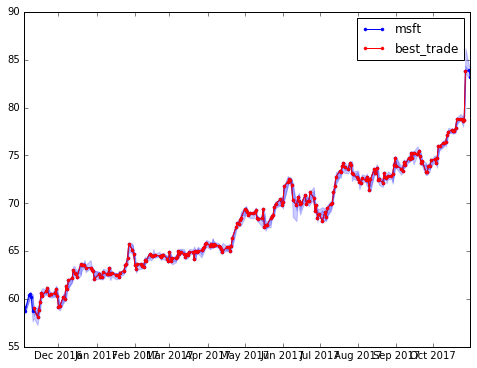

In [27]:
#qs[0:5]
#qs.index[0:5]
def get_a_best_trade(X):
    # note: if there are multiple instances of best trade, this will only get the first one. we can
    # get the last one by using a <= operator. we can get all the trades efficiently by doing a 
    # subsequent sweep through the input data for values x=x_low, x=x_high. from there, the number of
    # "best" trades is the permutation of those values.
    #
    x_min  = X[0]
    dx_max = X[1]-X[0]
    j_buy   = 0
    j_sell  = 1
    #
    for j,x in enumerate(X[1:]):
        #x_min = min(x_min, x)
        if x<x_min:
            j_buy = j
            x_min = x
        #
        dx = x - x_min
        #
        if dx>dx_max:
            j_sell  = j
            dx_max = dx
        #
    #
    # now, the efficient, c-type approach is to return just the indices of the lo,hi values;
    # the user provided the data; they can sort it out. so for now, let's just do that. we also
    # know that they must be sequential.
    #
    return (j_buy, j_sell)
#
#############
#############
#
#my_stocks = ['tsla', 'msft']
my_stock = 'msft'
start = dtm.datetime(2008,1,1)
end   = dtm.datetime.now()
#
# there are a few syntax options:
#q = pdr.get_quote_google(['AMZN', 'GOOG'] )
#
#qs = pdr.DataReader(*my_stocks, start, end)
#qs = pdr.DataReader('TSLA', "yahoo", start, end)
qs = pdr.DataReader(my_stock, "google", start, end)
#
## note that, as i recall, the yahoo engine will not account for splits, etc.
## you can get the splits, etc. from "actions" (and then i assume there is some convolving to do):
#actions = web.DataReader('AAPL', 'yahoo-actions', start, end)
#

print('columns: {}'.format(qs.columns))

plt.figure(figsize=(8,6))
plt.clf()
#
j0,j1 = get_a_best_trade(qs.Close)
print('best_trade_indices: ', j0,j1)
#
clr = 'b'
plt.plot(qs.index, qs.Close, '.-', color=clr, label=my_stock)
plt.fill_between(qs.index, qs.High, qs.Low, color=clr, alpha=.2)
plt.fill_between(qs.index, qs.Open, qs.Close, color=clr, alpha=.2)
#
plt.plot(qs.index[j0:j1+1], qs.Close[j0:j1+1], ls='-', marker='.', color='r', label='best_trade')
#
plt.legend(loc=0)